# Fire up libraries

In [78]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [79]:
sales = pd.read_csv('home_data.csv')

In [80]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [81]:
sales[sales['id']==1839920160]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11860,1839920160,20140714T000000,432000,3,2.0,1870,7080,1.0,0,0,...,7,1210,660,1969,0,98034,47.7244,-122.179,1620,8000


In [82]:
sales.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [83]:
sales.shape

(21613, 21)

# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

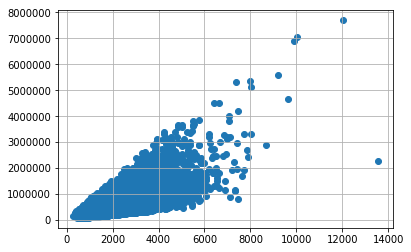

In [84]:
plt.grid('on')
plt.scatter(sales['sqft_living'], sales['price'])
plt.show()

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use random_state=200 so that everyone running this notebook gets the same results.  In practice, you may set a random seed.  

In [85]:
train_data = sales.sample(frac=0.8, random_state=200)
test_data  = sales.drop(train_data.index)
print(train_data.shape, test_data.shape)

(17290, 21) (4323, 21)


In [86]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11860,1839920160,20140714T000000,432000,3,2.00,1870,7080,1.0,0,0,...,7,1210,660,1969,0,98034,47.7244,-122.179,1620,8000
12446,6705850140,20141009T000000,750000,4,2.75,3170,7634,2.0,0,0,...,10,3170,0,1992,0,98075,47.5774,-122.054,2940,7846
10556,924069190,20140819T000000,440000,3,1.75,2000,11880,2.0,0,0,...,8,2000,0,1979,0,98075,47.5882,-122.052,1820,15120
4828,3211270170,20140523T000000,404000,4,3.00,4060,35621,1.0,0,0,...,9,2030,2030,1989,0,98092,47.3059,-122.108,2950,35259
3502,9523103001,20141013T000000,389000,2,1.00,850,3276,1.0,0,0,...,6,850,0,1910,0,98103,47.6742,-122.350,1460,4100


In [87]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.5,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
17,6865200140,20140529T000000,485000,4,1.0,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
18,16000397,20141205T000000,189000,2,1.0,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095


## Build the regression model using only sqft_living as a feature

In [88]:
x_train = train_data['sqft_living'].values.reshape(-1,1)
y_train = train_data['price'].values.reshape(-1,1)

In [89]:
simple_model = linear_model.LinearRegression()
simple_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

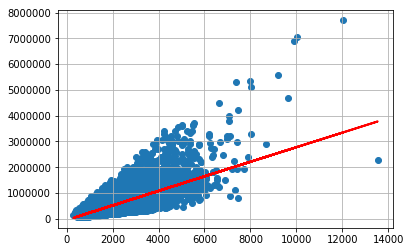

In [90]:
plt.grid('on')
plt.scatter(x_train, y_train)
plt.plot(x_train, simple_model.predict(x_train), color='red', linewidth=2)
plt.show()

# Let's show what our predictions look like

In [91]:
x_test = test_data['sqft_living'].values.reshape(-1,1)
y_test = test_data['price'].values.reshape(-1,1)

y_pred = simple_model.predict(x_test)

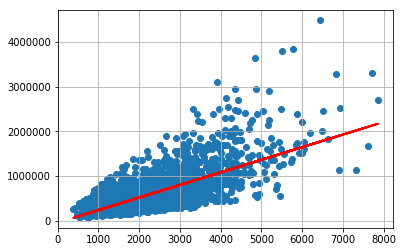

In [92]:
plt.grid('on')
plt.scatter(x_test, y_test)
plt.plot(x_test,y_pred, color='red', linewidth=2)
plt.show()

# Evaluate the simple model

In [93]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [94]:
print('intercept:', simple_model.intercept_, 'coefficients:', simple_model.coef_)
# The mean squared error
print("RMSE: %.2f" % (rmse(y_pred, y_test)))

intercept: [-46493.04519733] coefficients: [[ 282.27187583]]
RMSE: 254323.39


RMSE of about $254.323,39

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [95]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [96]:
sales[my_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


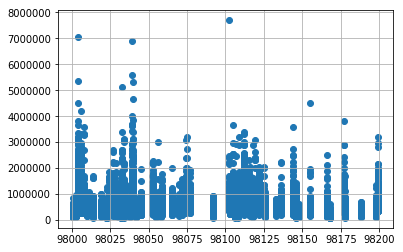

In [97]:
#sales.show(view='BoxWhisker Plot', x='zipcode', y='price')
plt.grid('on')
plt.scatter(sales['zipcode'], sales['price'])
plt.show()

98039 is the most expensive zip code.

# Build a regression model with more features

In [98]:
#my_features_model = (train_data,target='price',features=my_features,validation_set=None)
x_train = train_data[my_features].values.reshape(-1,len(my_features))
y_train = train_data['price'].values.reshape(-1,1)

In [99]:
mult_model = linear_model.LinearRegression()
mult_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Comparing the results of the simple model with adding more features

In [100]:
x_test = test_data[my_features].values.reshape(-1,len(my_features))
y_test = test_data['price'].values.reshape(-1,1)

y_pred = mult_model.predict(x_test)

In [101]:
print('intercept:', mult_model.intercept_, 'coefficients:', mult_model.coef_)
# The mean squared error
print("RMSE: %.2f" % (rmse(y_pred, y_test)))

intercept: [-56348418.94956037] coefficients: [[ -6.17445455e+04   1.88053371e+04   3.17237961e+02  -2.88006880e-01
   -9.68870610e+03   5.75218487e+02]]
RMSE: 249311.90


The RMSE goes down from \$254.323,39 to \$228.024,43 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [102]:
house1 = sales[sales['id']==5309101200]

In [103]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="house1.png">

In [104]:
print (house1['price'])

1054    620000
Name: price, dtype: int64


In [105]:
house1['sqft_living']

1054    2400
Name: sqft_living, dtype: int64

In [106]:
print (simple_model.predict(house1['sqft_living'].values.reshape(-1,1)))

[[ 630959.4568039]]


In [107]:
print (mult_model.predict(house1[my_features]))

[[ 630924.33807747]]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [108]:
house2 = sales[sales['id']==1925069082]

In [109]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="house2.jpg">

In [110]:
print (house2['price'])

1361    2200000
Name: price, dtype: int64


In [111]:
print (simple_model.predict(house2['sqft_living'].values.reshape(-1,1)))

[[ 1263248.45867172]]


In [112]:
print (mult_model.predict(house2[my_features]))

[[ 1270172.16078082]]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [113]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="house_bill.jpg">

In [114]:
print (simple_model.predict(pd.DataFrame(bill_gates)['sqft_living'].values.reshape(-1,1)))

[[ 14067100.74649498]]


The model predicts a price of over $14M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

In [115]:
print (mult_model.predict(pd.DataFrame(bill_gates)[my_features]))

[[ 15779944.98847018]]


# Answers


# 1 - Selection and summary statistics

In [116]:
zip_code = sales[sales['zipcode']==98039]

In [117]:
my_features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [118]:
zip_code[my_features].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,5.000000e+01,50.000000,50.000000,50.0000,50.000000,50.000000,50.0
mean,2.160607e+06,4.060000,3.200000,3800.9000,17403.560000,1.560000,98039.0
std,1.166477e+06,0.890081,1.366509,1764.5025,6655.224175,0.501427,0.0
min,7.875000e+05,2.000000,1.000000,1220.0000,6572.000000,1.000000,98039.0
25%,1.401000e+06,4.000000,2.250000,2680.0000,13797.500000,1.000000,98039.0
50%,1.892500e+06,4.000000,3.000000,3560.0000,17188.500000,2.000000,98039.0
75%,2.556250e+06,4.750000,3.687500,4452.5000,20052.250000,2.000000,98039.0
max,6.885000e+06,7.000000,7.750000,9890.0000,35069.000000,2.000000,98039.0


In [119]:
print ('O preço médio de venda da vizinhança é $%.2f.' % (zip_code['price'].mean()))

O preço médio de venda da vizinhança é $2160606.60.


# 2 - Filtering data

In [120]:
area_filter = sales[(sales['sqft_living']>=2000) & (sales['sqft_living']<=4000)]

In [121]:
print(area_filter.head())

            id             date    price  bedrooms  bathrooms  sqft_living  \
1   6414100192  20141209T000000   538000         3       2.25         2570   
10  1736800520  20150403T000000   662500         3       2.50         3560   
15  9297300055  20150124T000000   650000         4       3.00         2950   
21  2524049179  20140826T000000  2000000         3       2.75         3050   
22  7137970340  20140703T000000   285000         5       2.50         2270   

    sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1       7242     2.0           0     0     ...          7        2170   
10      9796     1.0           0     0     ...          8        1860   
15      5000     2.0           0     3     ...          9        1980   
21     44867     1.0           0     4     ...          9        2330   
22      6300     2.0           0     0     ...          8        2270   

    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1             400   

In [122]:
print ('O percentual de casas que possuem áreas entre 2000 e 4000 pés quadrados é de: %.2f.' % (float(area_filter['zipcode'].count())/(sales['zipcode'].count()) * 100))

O percentual de casas que possuem áreas entre 2000 e 4000 pés quadrados é de: 42.66.


# 3 - Building a regression model with several more features

In [123]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade',
                     'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built']

In [124]:
train_data = sales.sample(frac=0.8, random_state=0)
test_data  = sales.drop(train_data.index)
print(train_data.shape, test_data.shape)

(17290, 21) (4323, 21)


In [125]:
x_train = train_data[advanced_features].values.reshape(-1,len(advanced_features))
y_train = train_data['price'].values.reshape(-1,1)

In [126]:
mult_model_2 = linear_model.LinearRegression()
mult_model_2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
x_test = test_data[advanced_features].values.reshape(-1,len(advanced_features))
y_test = test_data['price'].values.reshape(-1,1)

y_pred = mult_model_2.predict(x_test)

In [128]:
print('intercept:', mult_model_2.intercept_, 'coefficients:', mult_model_2.coef_)
# The mean squared error
print(" Modelo 2 (advanced_features) RMSE: $%.2f" % (rmse(y_pred, y_test)))

intercept: [ 13004871.85538595] coefficients: [[ -4.60333219e+04   4.82798565e+04   1.18133803e+02  -2.92855388e-01
    2.30163539e+04  -6.68895519e+01   1.77369783e+04   1.24850536e+05
    5.51509051e+05   4.25048244e+04   5.76996688e+01   6.04341345e+01
   -3.69252993e+03]]
 Modelo 2 (advanced_features) RMSE: $205909.88


No primeiro modelo, usando um conjunto menor de características (my_features), foi encontrado um RMSE de 249311.90. Já no segundo modelo, usando um conjunto maior de características (advanced_features), foi encontrado um RMSE de 205909.88. Uma vez que, o objetivo é minimizar o erro médio quadrado, podemos dizer que o segundo modelo representa melhor a relação existente na base de dados, contudo, existe a possibilidade de "overfitting", o que resultaria em piores resultados em outro conjunto de dados.